In [1]:
from rich.jupyter import print
from rich.markdown import Markdown

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

def get_files(dir_path):
    file_list = os.listdir(dir_path)
    all_files = list()
    # Iterate over all the entries
    for entry in file_list:
        # Create full path
        full_path = os.path.join(dir_path, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(full_path):
            all_files = all_files + get_files(full_path)
        else:
            all_files.append(full_path)
                
    return all_files

def plot_graph(df, title, index, include_ylim, ylim, xlim):
    if include_ylim:
        df.plot(ax=axes[index], title=title, grid=True, ylim=ylim, xlim=xlim)
    else:
        df.plot(ax=axes[index], title=title, grid=True, xlim=xlim)
    axes[index].axhline(df.mean(), color='red', xmin=0, xmax=len(df.index))
    axes[index].margins(x=0)
    
def plot_cdf(df, label, index):
    axes[index].hist(df, cumulative=True, label=label, histtype="step", color="b", bins=len(df.index))
    axes[index].margins(x=0)


# Set 2 - Participant Measure Data Analysis/Visualisation

Welcome to the second set of tests. Just as a reminder here are the 4 sets of tests:

    Base Case
    Participant Measure
    Denial of Service
    Data Access

Set 2 - Participant Measure looks at the impact on increasing the number of participants.

There are two types of tests:

    Unicast
    Multicast

For each test we have the following participant values:

    10 publishers + 10 subscribers
    25 publishers + 25 subcscribers
    50 publishers + 50 subscribers
    100 publishers + 100 subscribers

We plan on splitting the tests between unicast and multicast starting with unicast:

## Unicast

We start off by comapring the latencies of Run 1 for each participant amount.


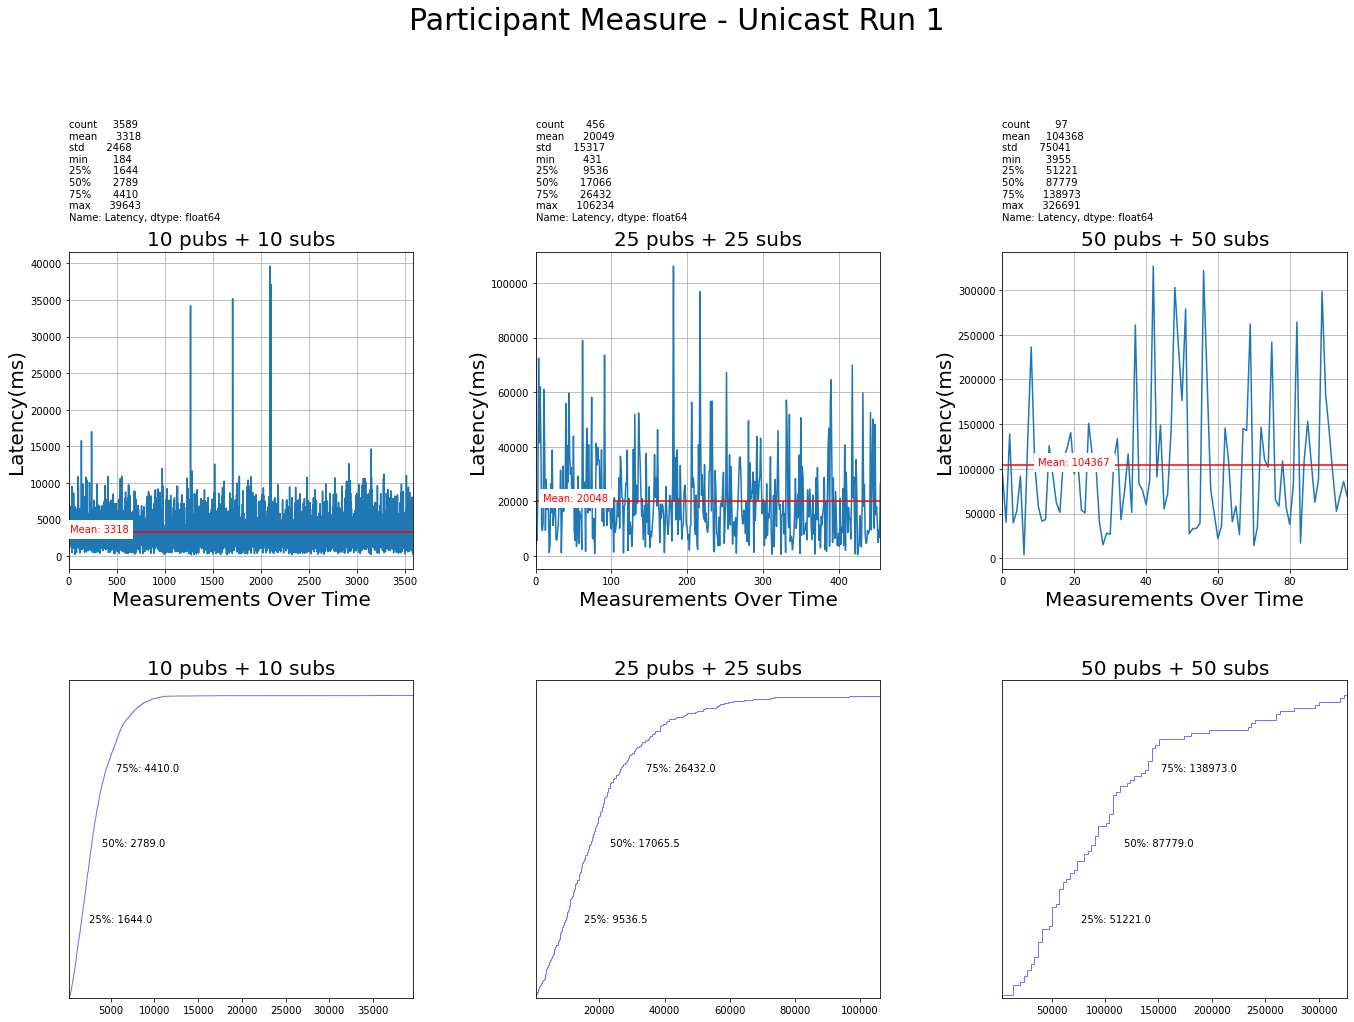

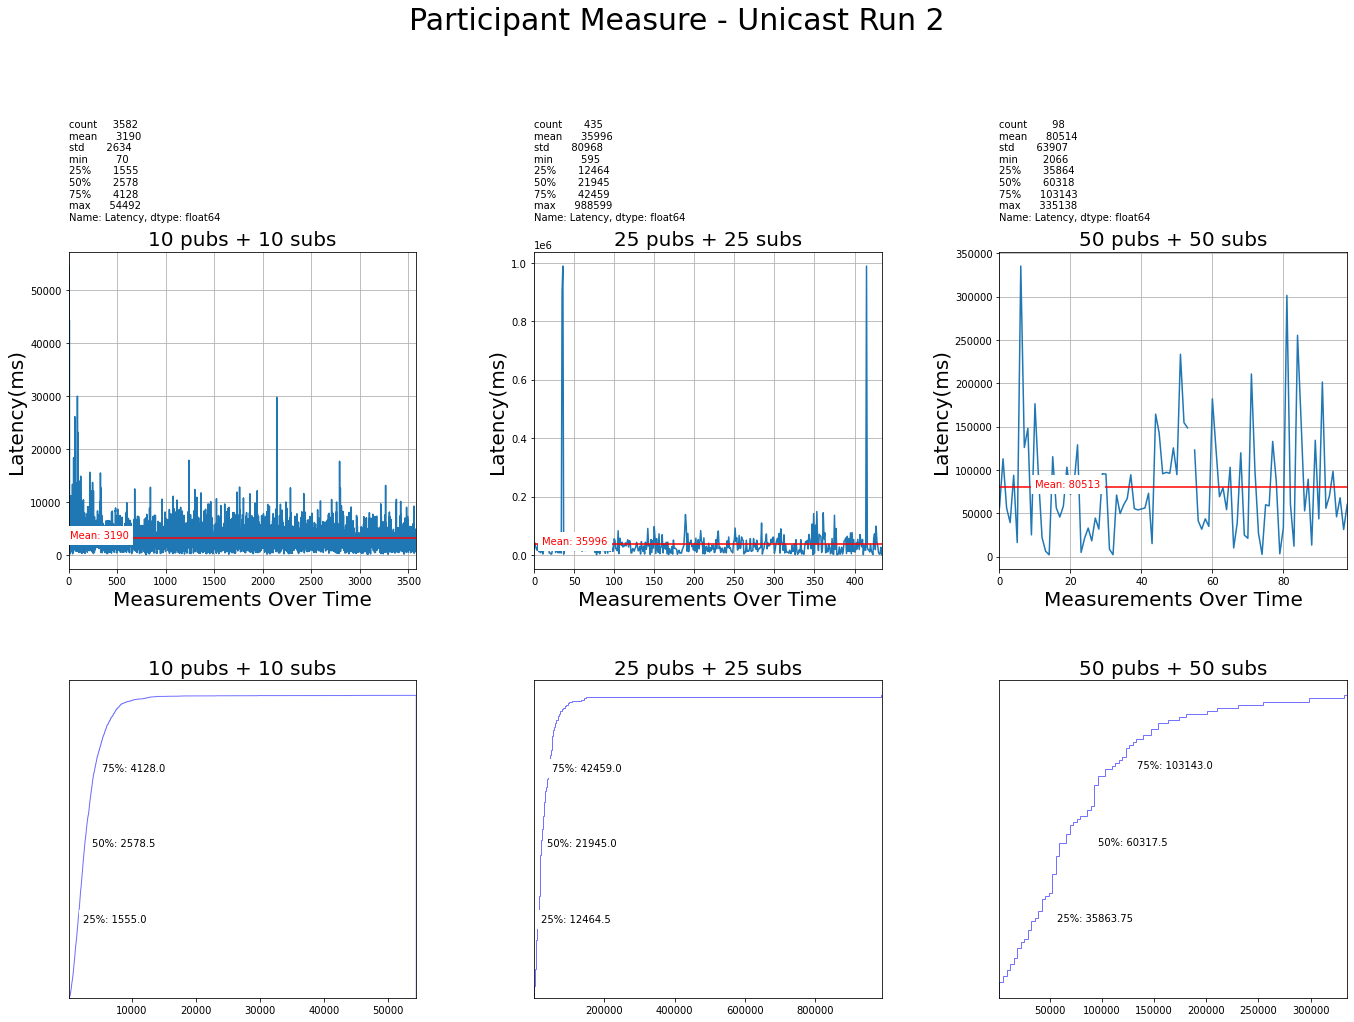

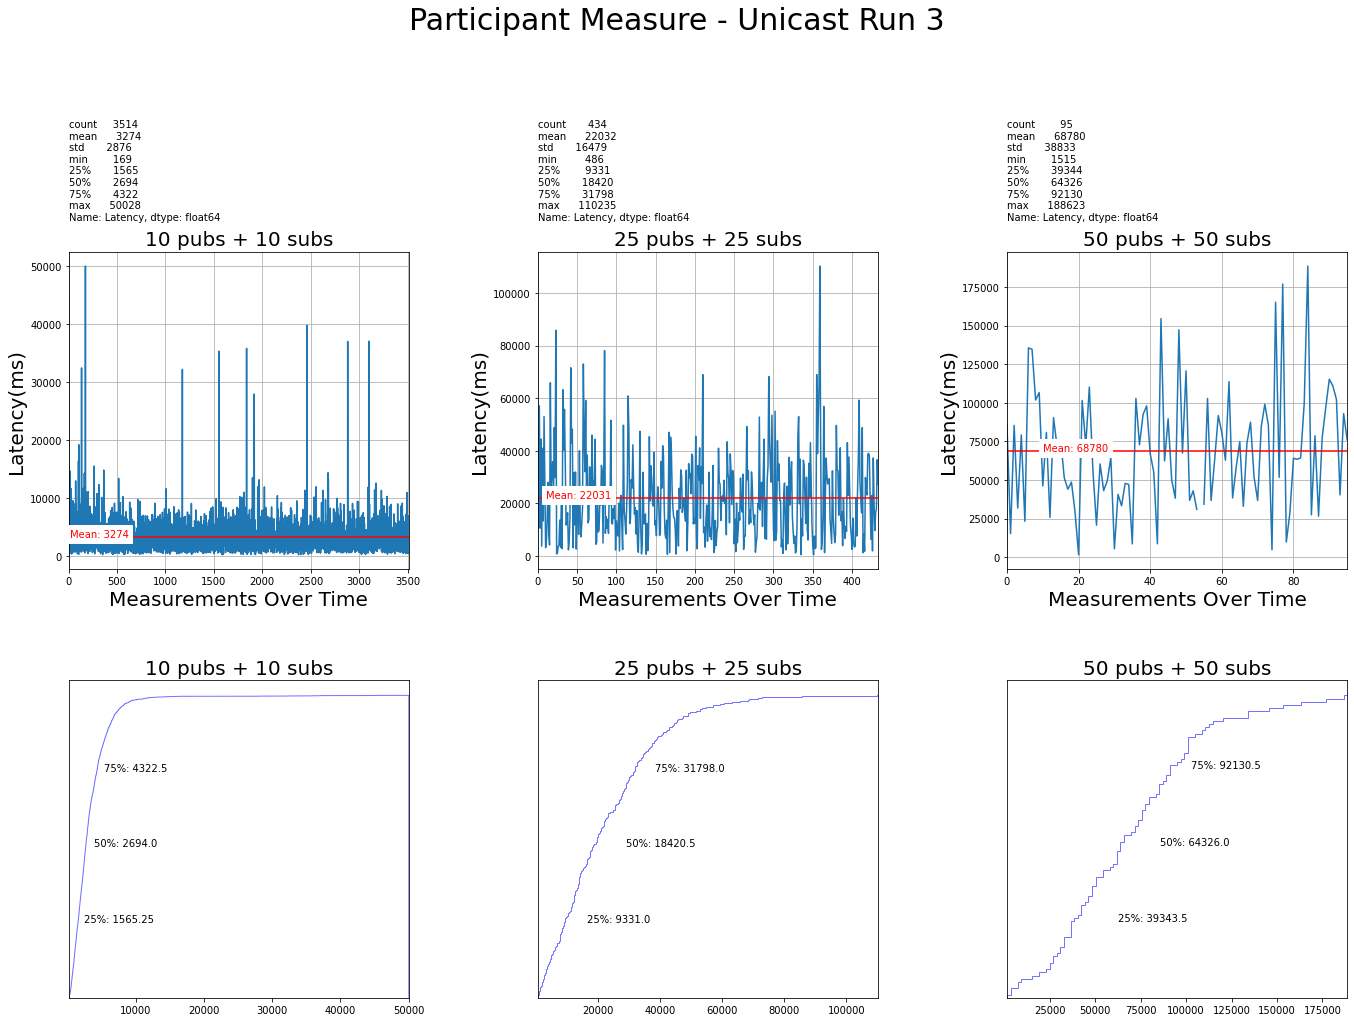

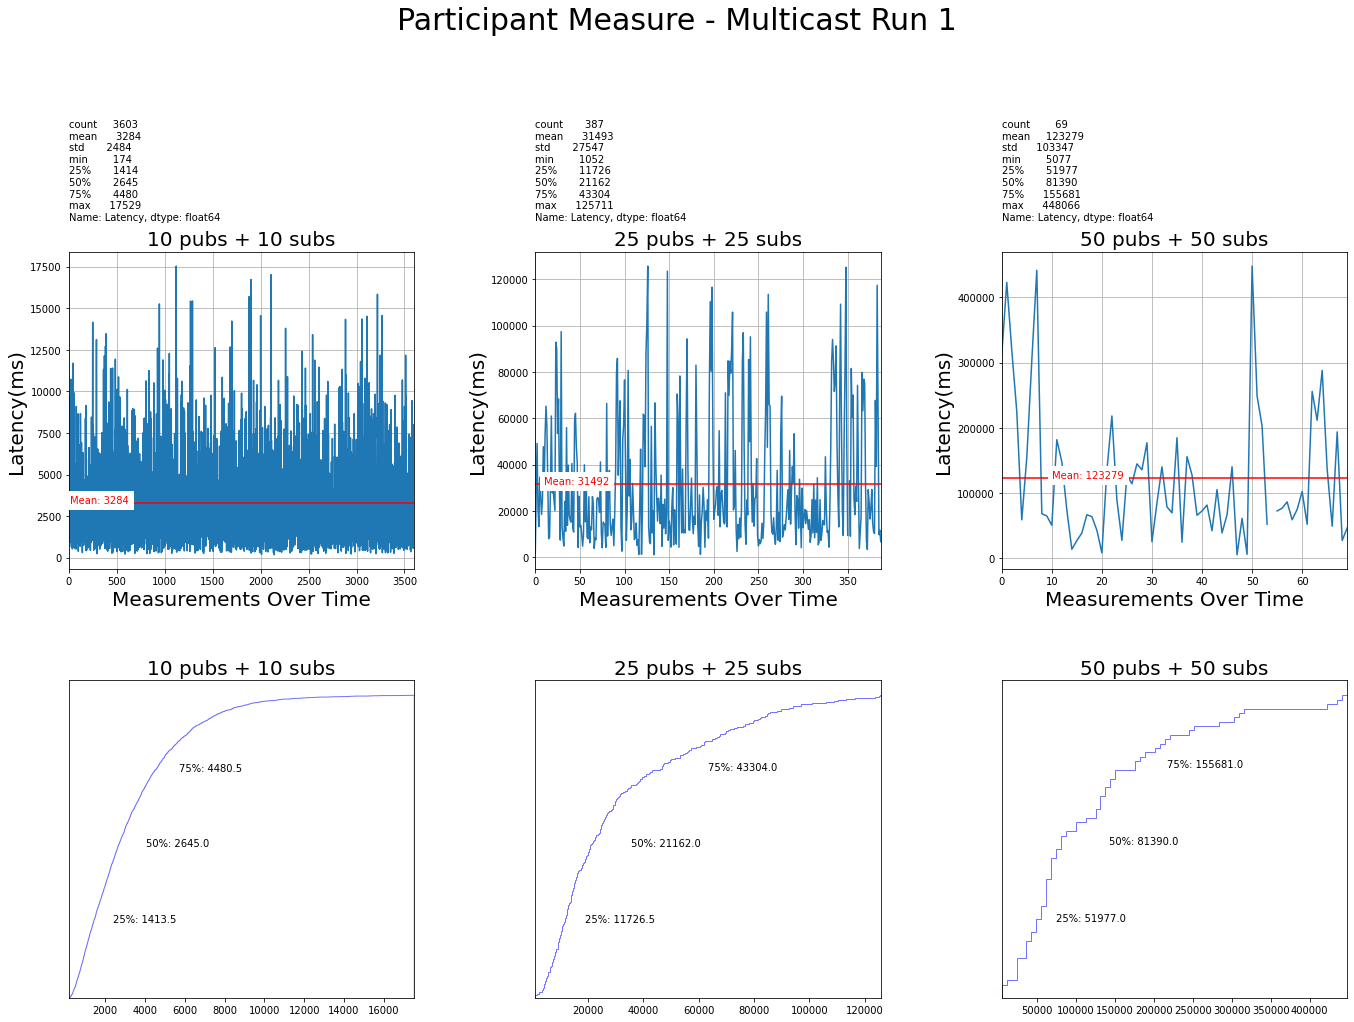

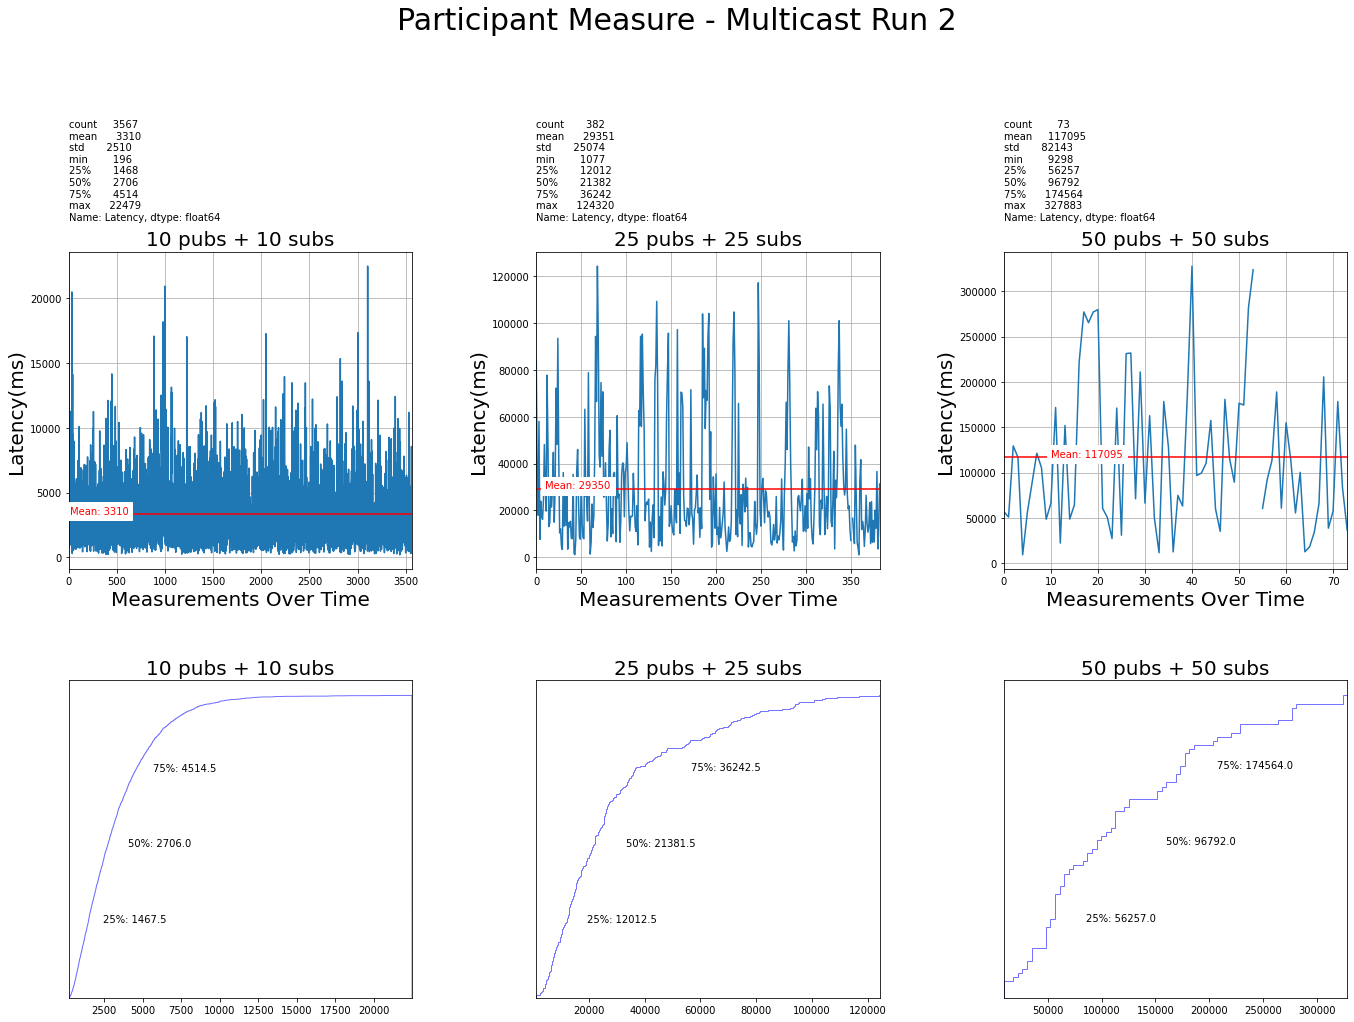

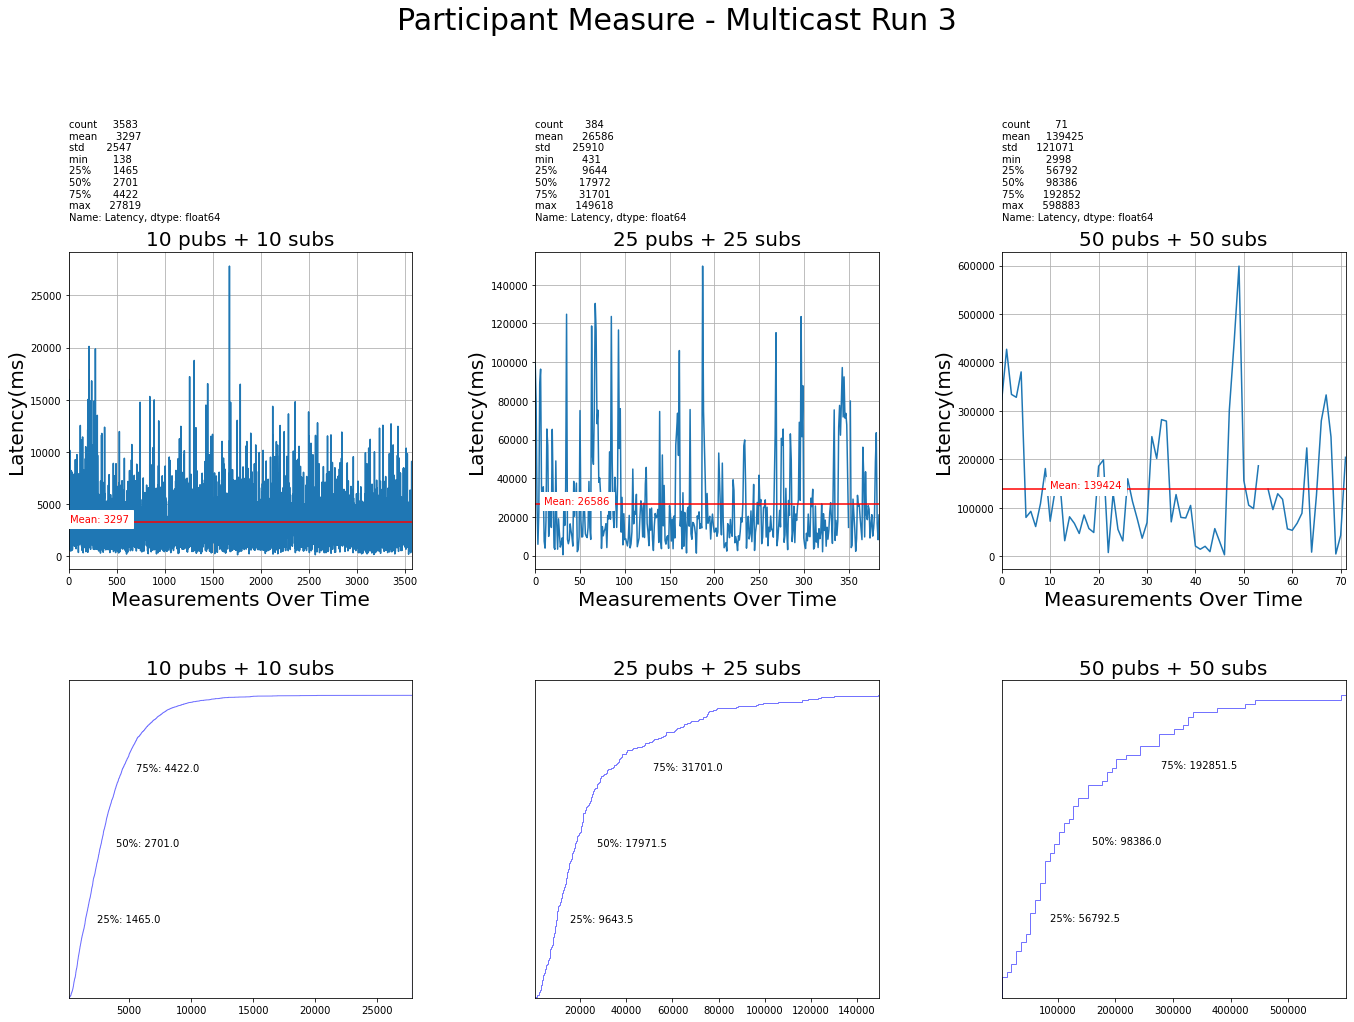

In [2]:
pd.set_option('precision', 0)
# Get all files related to this test set (set 2 - PM)
all_files = get_files('data/set_2')
all_files = [file for file in all_files if 'clean_' in file]

unicast_files = [file for file in all_files if 'unicast' in file and '4' not in file]
multicast_files = [file for file in all_files if 'multicast' in file and '4' not in file]

def plot_runs(files, run, figure_title):
    latency_files = [file for file in files if run in file and 'pub_0' in file]
    latency_files.sort() # Sort in order

    figure, axes = plt.subplots(nrows=2, ncols=len(latency_files), figsize=(20, 15))
    for file in latency_files:
        df = pd.read_csv(file)["Latency"]
        i = latency_files.index(file)

        if i == 0:
            title = "10 pubs + 10 subs"
        elif i == 1:
            title = "25 pubs + 25 subs"
        elif i == 2:
            title = "50 pubs + 50 subs"
        else:
            title = "100 pubs + 100 subs"

        # Plot line graphs
        i = (0, latency_files.index(file))
        df.plot(ax=axes[i], grid=True)
        axes[i].axhline(df.mean(), color='red', xmin=0, xmax=len(df.index))
        axes[i].margins(x=0)
        axes[i].text(10, df.mean(), "Mean: " + str(int(df.mean())), color='r', size='medium', backgroundcolor='white')
        axes[i].set_ylabel('Latency(ms)', size=20)
        axes[i].set_xlabel('Measurements Over Time', size=20)
        axes[i].set_title(title, size=20)
        axes[i].text(0, 1.1, str(df.describe()), size="medium", backgroundcolor="white", transform=axes[i].transAxes)
        
        # Plot CDFs
        i = (1, latency_files.index(file))
        axes[i].hist(df, cumulative=True, histtype="step", color="b", bins=len(df.index), alpha=0.55)
        axes[i].set_yticks([])
        axes[i].margins(x=0)
        axes[i].set_title(title, size=20)
        axes[i].text(df.quantile(0.45), len(df.index) * 0.25, "25%: " + str(df.quantile(0.25)), size="medium", backgroundcolor="white")
        axes[i].text(df.quantile(0.7), len(df.index) / 2, "50%: " + str(df.quantile(0.5)), size="medium", backgroundcolor="white")
        axes[i].text(df.quantile(0.85), len(df.index) * 0.75, "75%: " + str(df.quantile(0.75)), size="medium", backgroundcolor="white")

#     figure.set_figheight(10)
#     figure.set_figwidth(15)
    figure.suptitle(figure_title, size=30)
    plt.tight_layout(pad=5)
    
plot_runs(unicast_files, 'run_1', 'Participant Measure - Unicast Run 1')
plot_runs(unicast_files, 'run_2', 'Participant Measure - Unicast Run 2')
plot_runs(unicast_files, 'run_3', 'Participant Measure - Unicast Run 3')

plot_runs(multicast_files, 'run_1', 'Participant Measure - Multicast Run 1')
plot_runs(multicast_files, 'run_2', 'Participant Measure - Multicast Run 2')
plot_runs(multicast_files, 'run_3', 'Participant Measure - Multicast Run 3')

# Unicast VS Multicast Per Run

## Run 1

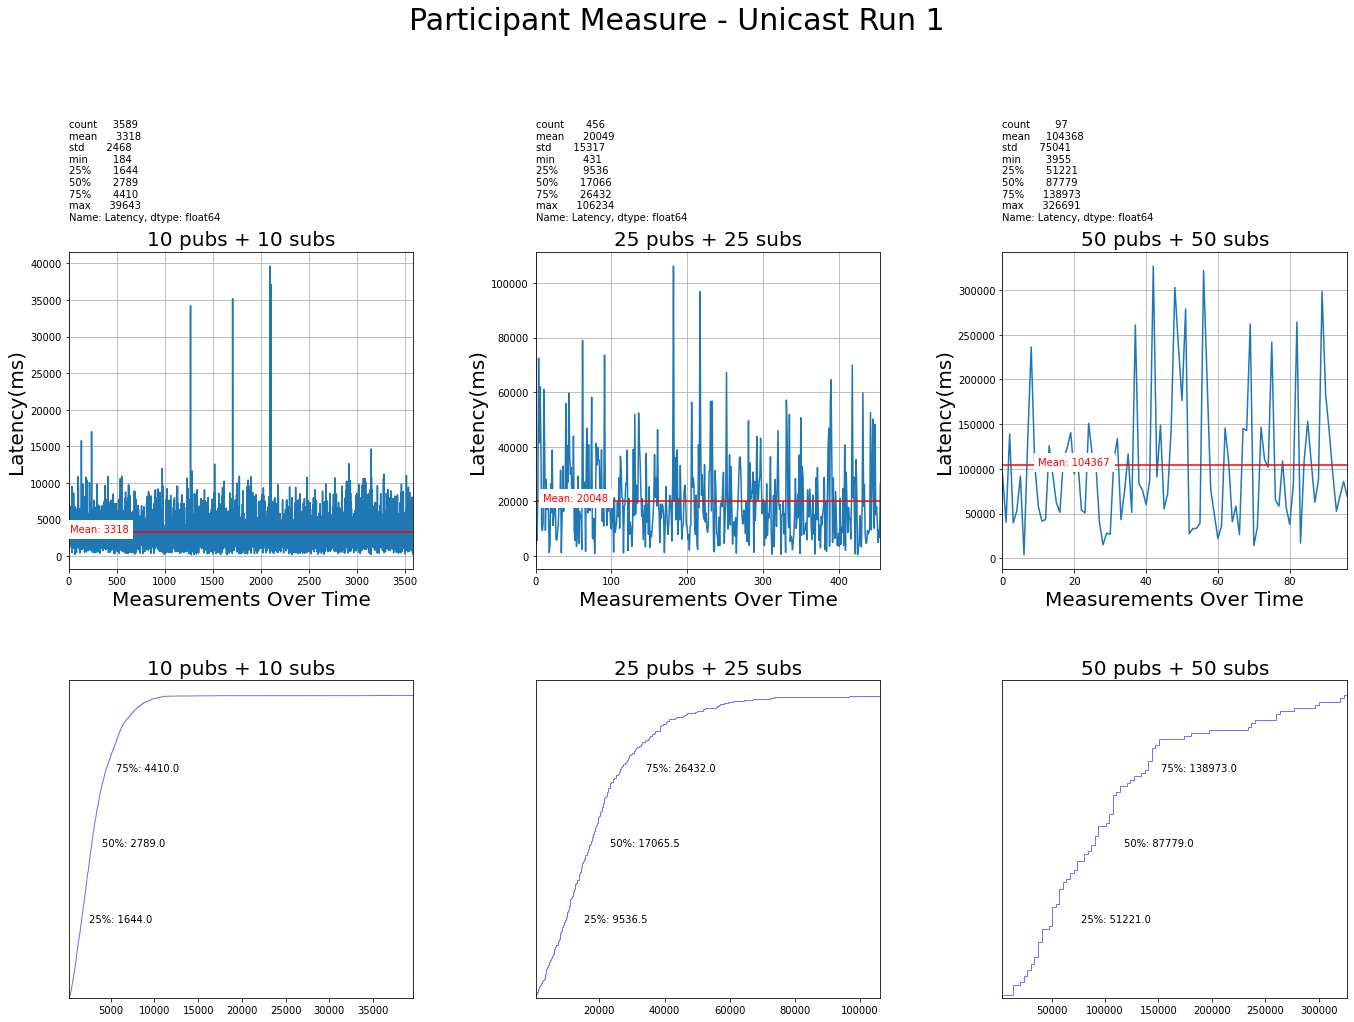

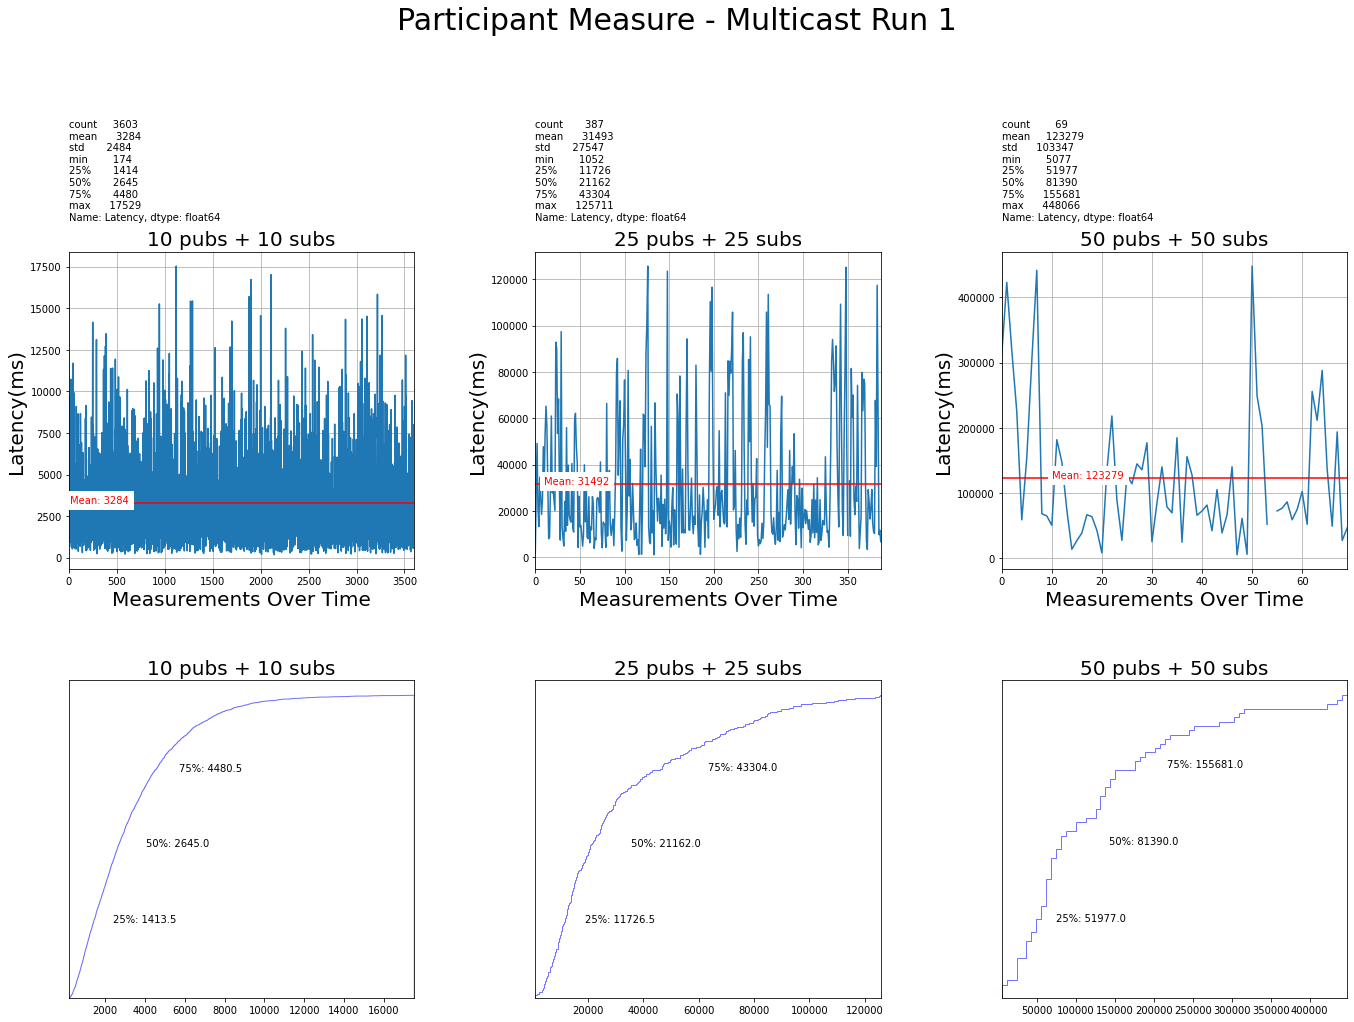

In [3]:
plot_runs(unicast_files, 'run_1', 'Participant Measure - Unicast Run 1')
plot_runs(multicast_files, 'run_1', 'Participant Measure - Multicast Run 1')